In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=40)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd

def plot_img(data):
    plt.imshow(data, cmap = "gray",interpolation="nearest")
    plt.axis("off")
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [2]:
data = pd.read_csv('Info.txt', header=0, sep=" ", index_col=0 )
data.head()

,tissue,abnormality,severity,x_pos,y_pos,radius_of_anormality
id,,,,,,
mdb001,G,CIRC,B,535,425,197.0
mdb002,G,CIRC,B,522,280,69.0
mdb003,D,NORM,NaN,NaN,NaN,NaN
mdb004,D,NORM,NaN,NaN,NaN,NaN
mdb005,F,CIRC,B,477,133,30.0


In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['tissue'] = le.fit_transform(data['tissue'])
data['abnormality'] = le.fit_transform(data['abnormality'])
data['severity'] = data['severity'].fillna('NORM')
data['severity'] = le.fit_transform(data['severity'])
data['radius_of_anormality'] = data['radius_of_anormality'].fillna(-99999)
print("Data shape", data.shape)
data.head()

Data shape (330, 6)


,tissue,abnormality,severity,x_pos,y_pos,radius_of_anormality
id,,,,,,
mdb001,2,3,0,535,425,197.0
mdb002,2,3,0,522,280,69.0
mdb003,0,5,2,NaN,NaN,-99999.0
mdb004,0,5,2,NaN,NaN,-99999.0
mdb005,1,3,0,477,133,30.0


In [4]:
print("\nLabel mapping:")
for i, item in enumerate(le.classes_):
    print(item, '-->', i)


Label mapping:
B --> 0
M --> 1
NORM --> 2


In [5]:
import cv2
import numpy as np
mylist = []

In [6]:
for image in data.index:
    # Load an image 
    #image = image.rstrip('\n')
    image = image
    image = "/home/talov_speakliz/p35_/jupyter/ip/images/" + image + '.jpg'
    X = cv2.imread(image, 0)
    mylist.append(X)

In [7]:
data['images'] = [x for x in mylist ]
data.head()

,tissue,abnormality,severity,x_pos,y_pos,radius_of_anormality,images
id,,,,,,,
mdb001,2,3,0,535,425,197.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
mdb002,2,3,0,522,280,69.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
mdb003,0,5,2,NaN,NaN,-99999.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
mdb004,0,5,2,NaN,NaN,-99999.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
mdb005,1,3,0,477,133,30.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [122]:
data.to_pickle('MAMMOGRAMS_DATA')

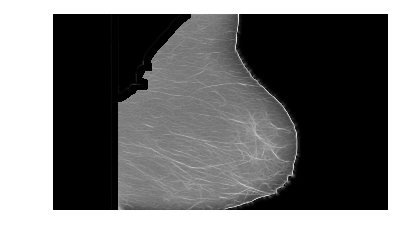

In [125]:
img1 = data.iloc[6]['images']
plot_img(img1)

In [13]:
(data['severity'] ==2).value_counts()

True     207
False    123
Name: severity, dtype: int64